<h2>Executive Summary </h2> <br>

<strong> Created by. </strong> <br> Diego Cruz-Galarza

<strong> Case. Apprentice Chef, Inc.</strong> <br>

<strong> Context. </strong> Apprentice Chef, Inc. is a start-up which offers meals cooked  at home under 30 minutes. The target audience are busy professional with little to no skills in the kitchen. The company preferred channels are an on-line platform and a mobile application. 

General Product Specifications.
    
   - 30 min to finish cooking.
   - Disposable cookware.
   - Delicious and healthy eating.
<br>
<br>  
<br> 


<strong> Revenue Goal. </strong> Analysis on how the revenue is influenced by customers within the first year of using the service.

<strong> Revenue Insights. </strong> 

 - Total meals ordered and largest order size contribute much to the revenue since it is Quantity x Price.
 
 - Unique meals purchased have a negative relationship with revenue. This reflects how customers tend to opt for the same meal. It would be interesting to compare the kind of meals and analyze the possibility of increasing the menu.
  
 - There is an interesting dip in Revenue when it reaches approx 2k. We suggest to create new deals targgeting clients which contribute the most to the revenue.

![<caption>](correlation.png)
 
<strong> Revenue Results. </strong>  Our best model was a OLS with r squared 0.732. It predicts how the revenue is impacted by the variables collected.
<br>
![<caption>](results_rev.png)
<kbd> Results from analyzing the variable revenue.</kbd>
<br>

<strong> Cross Sell Promotion Goal. </strong> Analysis of success on the new subscription where customers receive half bottle of wine every Wednesday from a local California vineyard.

<strong> Cross Sell Promotion Insights. </strong> 

 - Junk emails created a bad correlation with cross sell promotions. It would be nice to implement an email marketing campaign to these customers and see the results. If we see potential in this group we might consider running another campaign in a different platform.

 - If communications about the subscription are through email, professionals and personal emails are the ones that are going to open and click on it 

<strong> Cross Sell Promotion Results. </strong> Our best performing model was Tuned Tree with an AUC score of 0.855. Predicting whether or not a customer will subscribe to the new service.
    
![<caption>](results_css.png) 
<kbd> Results from analyzing cross sell promotion.</kbd>
<br>
<br>  
<br>

<h2> Code. </h2> 

In [1]:
# importing libraries
import pandas as pd                                       # data science essentials
import matplotlib.pyplot as plt                           # essential graphical output
import seaborn as sns                                     # enhanced graphical output
import numpy as np                                        # mathematical functions, random number generators, and more
import random as rand                                     # random number gen
import statsmodels.formula.api as smf                     # predictive modeling with nice outputs
from sklearn.model_selection import train_test_split      # train test split
from sklearn.neighbors import KNeighborsRegressor         # KNN for Regression
from sklearn.preprocessing import StandardScaler          # standard scaler
from sklearn.linear_model import LinearRegression         # linear regression (scikit-learn)
from sklearn.model_selection import cross_val_score       # cross-validation 
import sklearn                                            # machine learning library
from sklearn.neighbors import KNeighborsRegressor         # KNN for Regression
from sklearn.preprocessing import StandardScaler          # standard scaler
from sklearn.model_selection import train_test_split      # train-test split
from sklearn.linear_model import LogisticRegression       # logistic regression
import statsmodels.formula.api as smf                     # logistic regression
from sklearn.metrics import confusion_matrix              # confusion matrix
from sklearn.metrics import roc_auc_score                 # auc score
from sklearn.neighbors import KNeighborsClassifier        # KNN for classification
from sklearn.neighbors import KNeighborsRegressor         # KNN for regression
from sklearn.preprocessing import StandardScaler          # standard scaler
from sklearn.tree import DecisionTreeClassifier           # classification trees
from sklearn.tree import export_graphviz                  # exports graphics
from six import StringIO                                  # saves objects in memory
from IPython.display import Image                         # displays on frontend
import pydotplus                                          # interprets dot objects
from sklearn.model_selection import RandomizedSearchCV    # hyperparameter tuning
from sklearn.metrics import make_scorer                   # customizable scorer
from sklearn.ensemble import RandomForestClassifier       # random forest
from sklearn.ensemble import GradientBoostingClassifier   # gbm

In [2]:
# specifying pandas file name
file = './datasets/Apprentice_Chef_Dataset.xlsx'

# loading data
chef =pd.read_excel(io= file) 


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
chef.head(n = 10)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.00,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0
1,1365.00,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170
2,800.00,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0
3,600.00,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0
4,1490.00,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205
5,1550.00,1,Genna Lannister,genna.lannister@protonmail.com,Genna,Lannister,36,2,9,1,190.18,1,4,0,1,4,1,0,0,3,1,0,78.8,1,1,3,12,0
6,1430.00,1,Olene Tyrell,olene.tyrell@mcdonalds.com,Olene,Tyrell,61,7,6,2,154.20,1,1,0,1,6,1,45,1,2,1,1,84.8,1,0,3,12,169
7,1321.25,1,Stevron Frey,stevron.frey@travelers.com,Stevron,Frey,13,1,12,3,228.73,1,0,0,1,6,1,13,0,0,0,0,63.0,1,0,1,15,0
8,1505.00,1,Praed,praed@nike.com,Praed,Praed,16,1,12,5,14.26,1,0,0,1,6,1,52,0,1,0,0,63.0,1,0,2,18,0
9,1493.00,0,Alysane Mormont,alysane.mormont@caterpillar.com,Alysane,Mormont,95,3,6,8,49.26,1,0,0,0,6,1,12,0,2,1,0,84.8,1,1,3,14,147


<h2strong> Data Visualization. </h2>

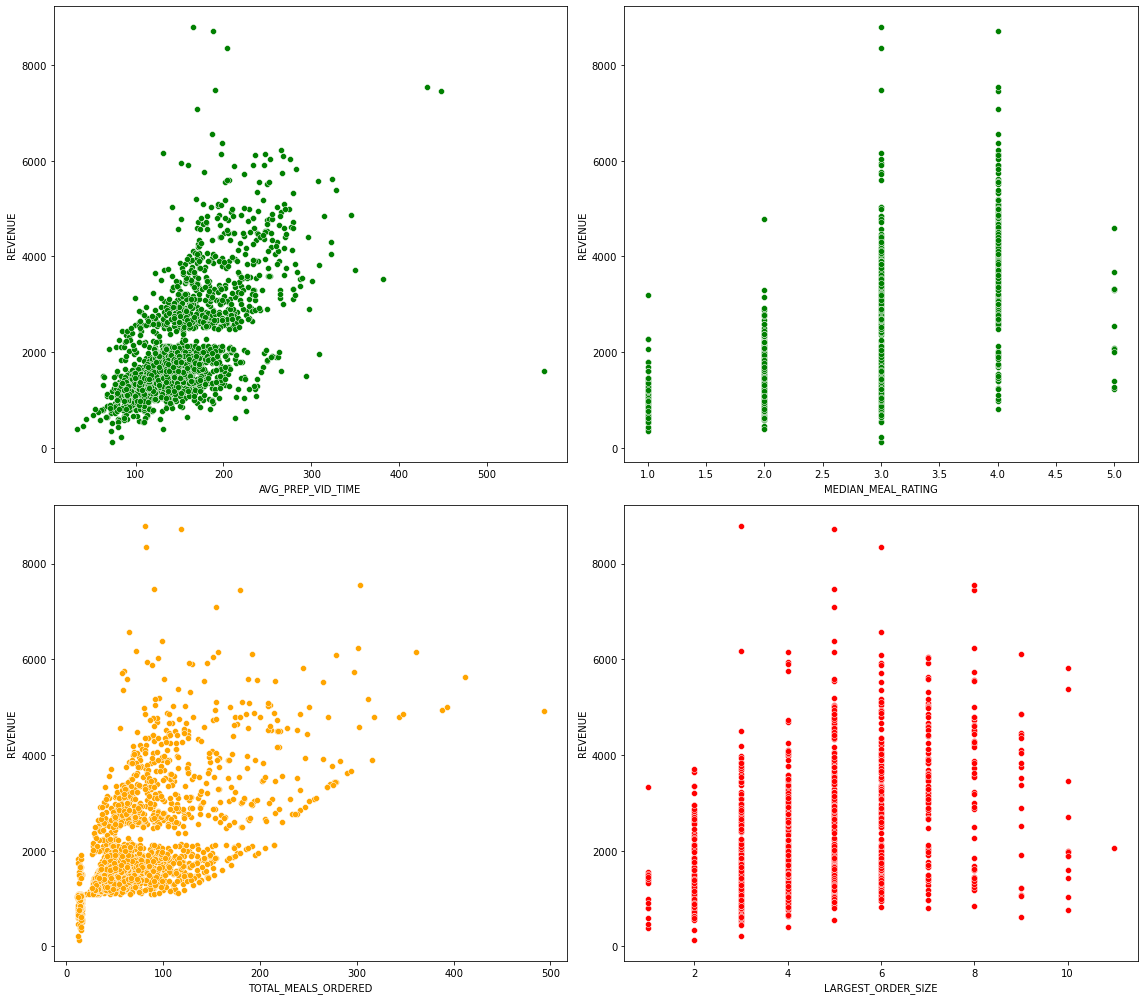

In [3]:
# Visual EDA (Scatterplots) N1

# setting figure size
fig, ax = plt.subplots(figsize = (16, 14))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['AVG_PREP_VID_TIME'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_PREP_VID_TIME')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['MEDIAN_MEAL_RATING'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'MEDIAN_MEAL_RATING')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['TOTAL_MEALS_ORDERED'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['LARGEST_ORDER_SIZE'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'LARGEST_ORDER_SIZE')
plt.ylabel(ylabel = 'REVENUE')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./analysis_images/Chef pro Scatterplots 1 of 6.png')
plt.show()

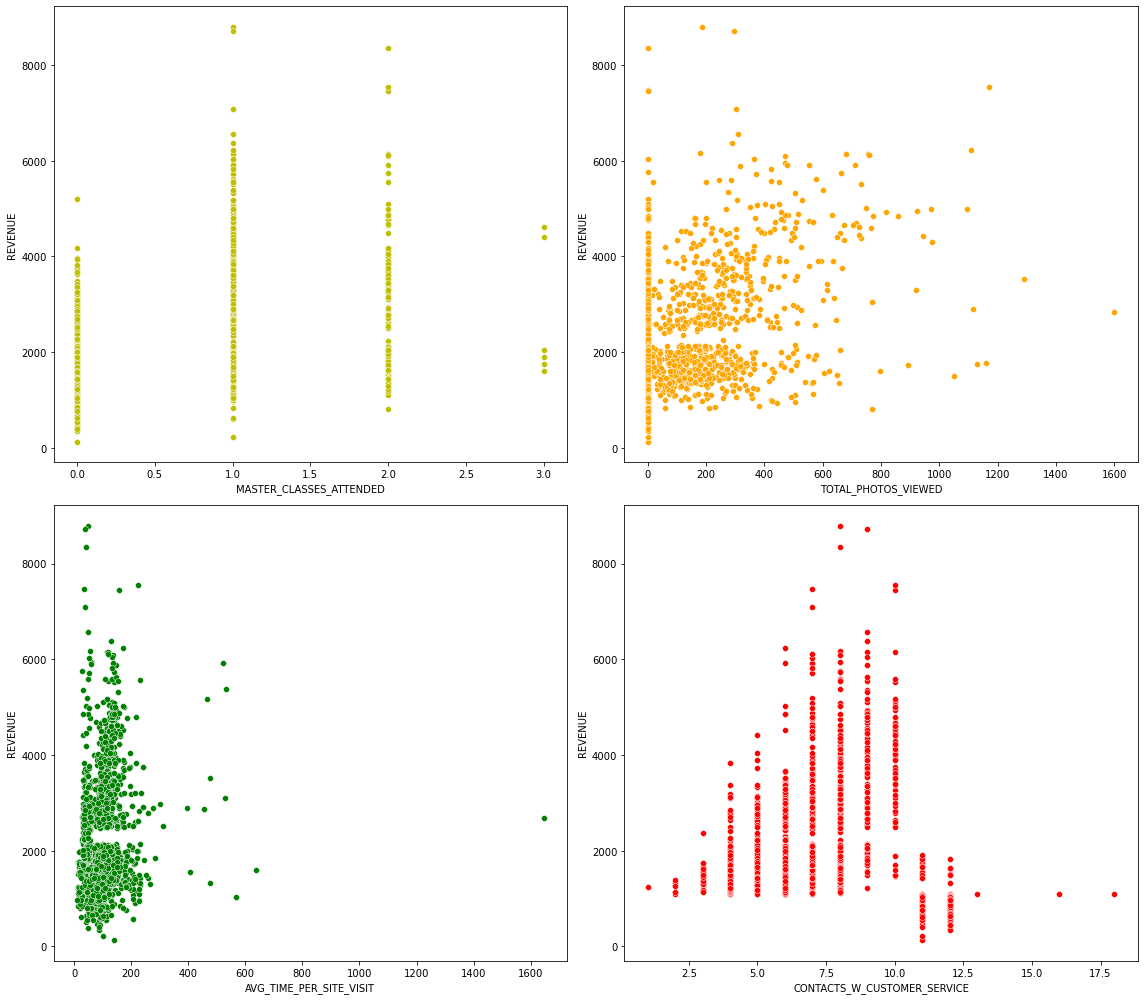

In [4]:
# Visual EDA (Scatterplots) N2

# setting figure size
fig, ax = plt.subplots(figsize = (16, 14))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['MASTER_CLASSES_ATTENDED'],
                y = chef['REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'MASTER_CLASSES_ATTENDED')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['TOTAL_PHOTOS_VIEWED'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'TOTAL_PHOTOS_VIEWED')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['AVG_TIME_PER_SITE_VISIT'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_TIME_PER_SITE_VISIT')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['CONTACTS_W_CUSTOMER_SERVICE'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'CONTACTS_W_CUSTOMER_SERVICE')
plt.ylabel(ylabel = 'REVENUE')

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./analysis_images/Chef pro Scatterplots 2 of 6.png')
plt.show()



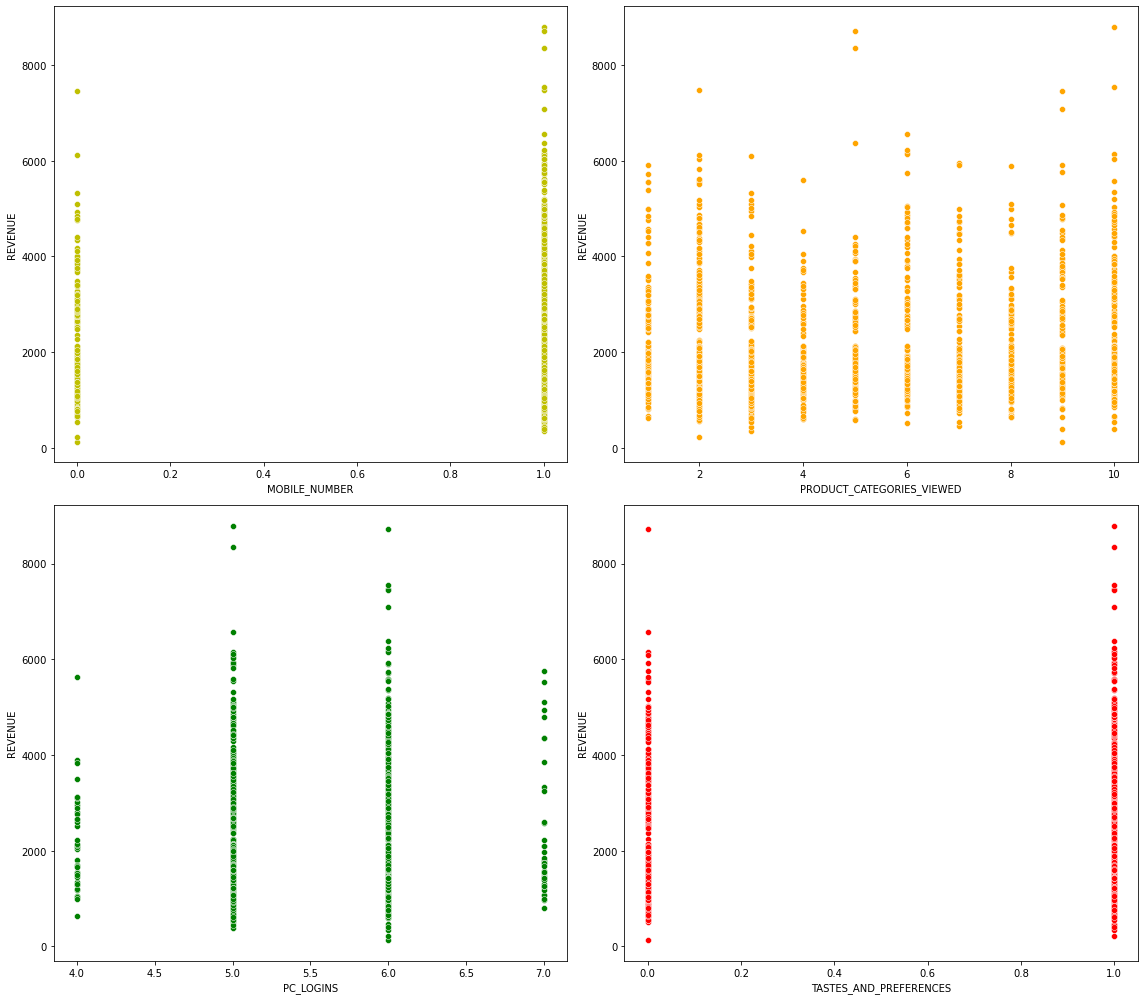

In [6]:
# Visual EDA (Scatterplots) N3

# setting figure size
fig, ax = plt.subplots(figsize = (16, 14))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['MOBILE_NUMBER'],
                y = chef['REVENUE'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'MOBILE_NUMBER')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['PRODUCT_CATEGORIES_VIEWED'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'PRODUCT_CATEGORIES_VIEWED')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['PC_LOGINS'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'PC_LOGINS')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['TASTES_AND_PREFERENCES'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'TASTES_AND_PREFERENCES')
plt.ylabel(ylabel = 'REVENUE')

# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./analysis_images/Chef pro Scatterplots 3 of 6.png')
plt.show()


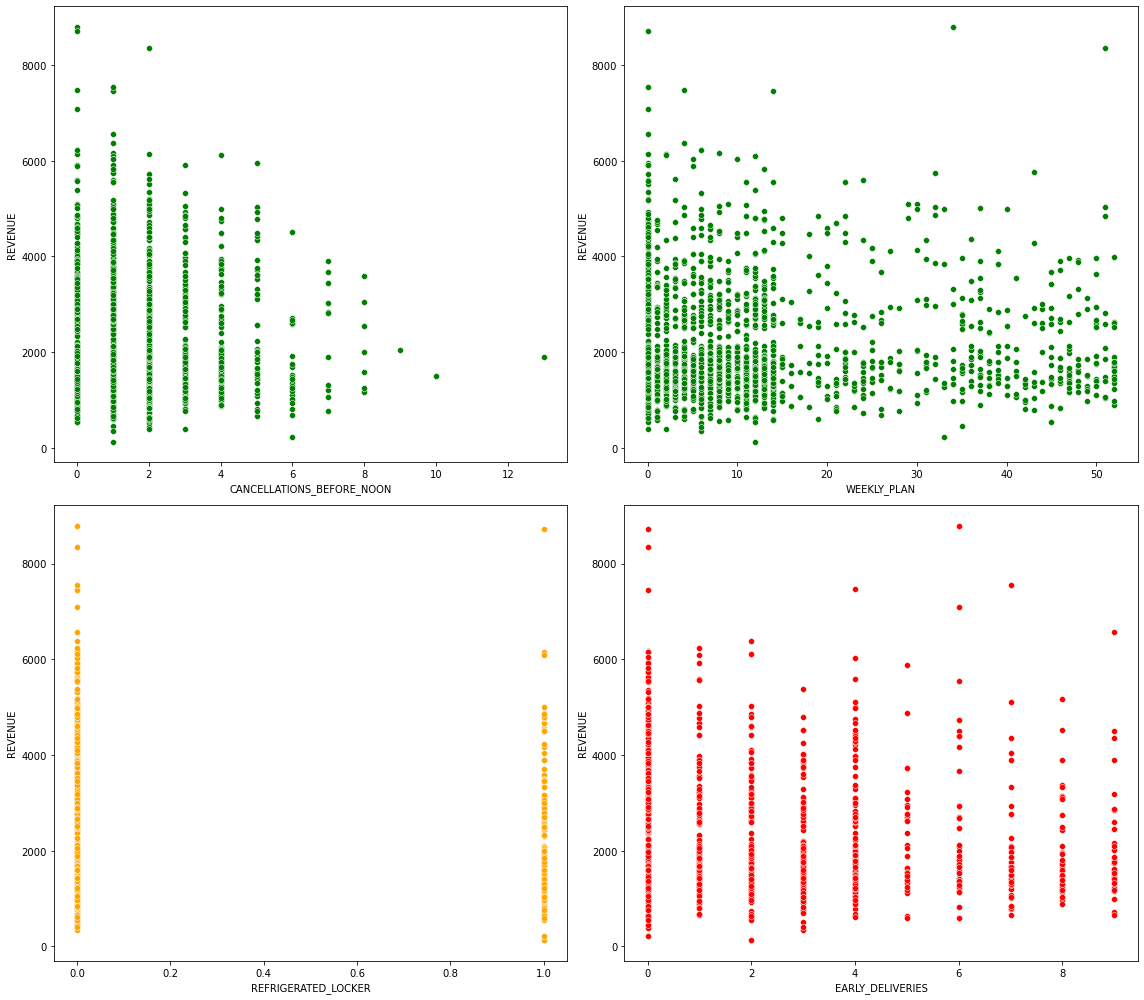

In [7]:
# Visual EDA (Scatterplots) N4

# setting figure size
fig, ax = plt.subplots(figsize = (16, 14))

# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['CANCELLATIONS_BEFORE_NOON'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'CANCELLATIONS_BEFORE_NOON')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['WEEKLY_PLAN'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'WEEKLY_PLAN')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['REFRIGERATED_LOCKER'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'REFRIGERATED_LOCKER')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['EARLY_DELIVERIES'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'EARLY_DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./analysis_images/Chef pro Scatterplots 4 of 6.png')
plt.show()

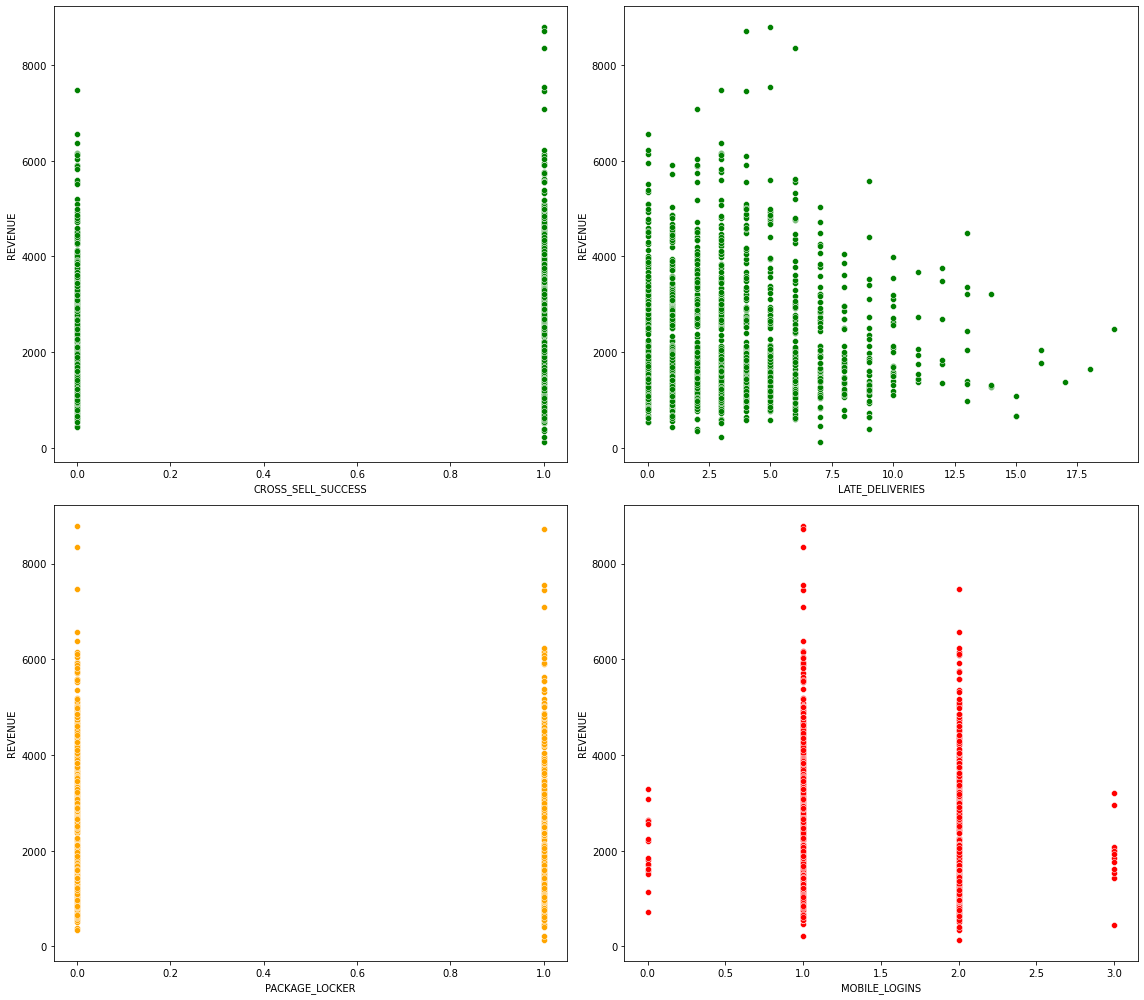

In [9]:
# Visual EDA (Scatterplots) N5

# setting figure size
fig, ax = plt.subplots(figsize = (16, 14))

# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['CROSS_SELL_SUCCESS'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'CROSS_SELL_SUCCESS')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['LATE_DELIVERIES'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'LATE_DELIVERIES')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['PACKAGE_LOCKER'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'PACKAGE_LOCKER')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = chef['MOBILE_LOGINS'],
                y = chef['REVENUE'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'MOBILE_LOGINS')
plt.ylabel(ylabel = 'REVENUE')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./analysis_images/Chef pro Scatterplots 5 of 6.png')
plt.show()


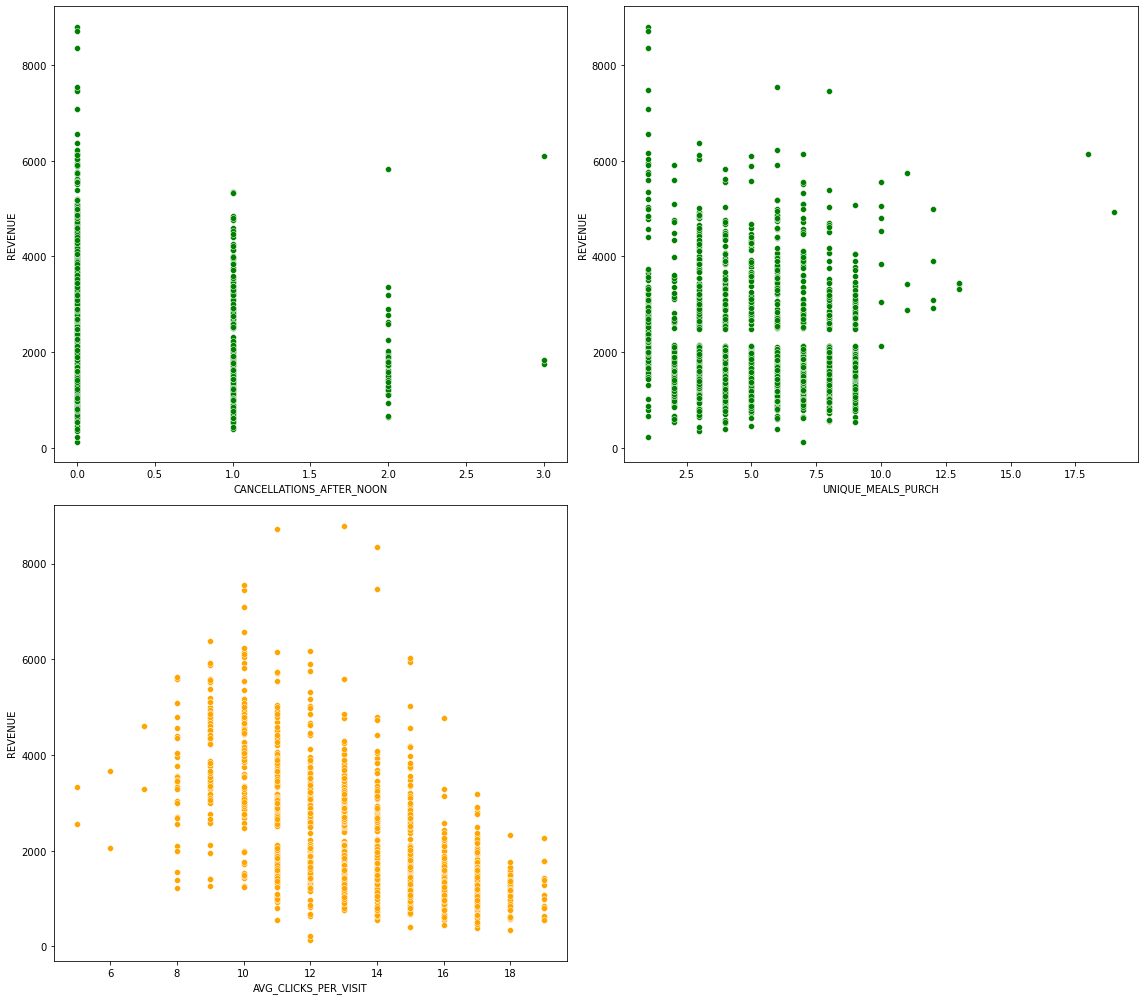

In [10]:
# Visual EDA (Scatterplots) N6

# setting figure size
fig, ax = plt.subplots(figsize = (16, 14))

# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['CANCELLATIONS_AFTER_NOON'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'CANCELLATIONS_AFTER_NOON')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = chef['UNIQUE_MEALS_PURCH'],
                y = chef['REVENUE'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'UNIQUE_MEALS_PURCH')
plt.ylabel(ylabel = 'REVENUE')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = chef['AVG_CLICKS_PER_VISIT'],
                y = chef['REVENUE'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'AVG_CLICKS_PER_VISIT')
plt.ylabel(ylabel = 'REVENUE')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.savefig('./analysis_images/Chef pro Scatterplots 6 of 6.png')
plt.show()


<h2> Data Engineering.</h2> <br>

In [11]:
# Applying log to continuos variables

# log transforming AVG_PREP_VID_TIME and saving it to the dataset
chef['log_AVG_PREP_VID_TIME'] = np.log10(chef['AVG_PREP_VID_TIME'])

# log transforming AVG_TIME_PER_SITE_VISIT and saving it to the dataset
chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(chef['AVG_TIME_PER_SITE_VISIT'])

# log transforming AVG_PREP_VID_TIME and saving it to the dataset
chef['log_AVG_PREP_VID_TIME'] = np.log10(chef['AVG_PREP_VID_TIME'])

# log transforming TOTAL_MEALS_ORDERED and saving it to the dataset
chef['log_TOTAL_MEALS_ORDERED'] = np.log10(chef['TOTAL_MEALS_ORDERED'])


In [12]:
# Changing some variables into binary

# dummy variable for having a basement, creating new column fill of 0
chef['has_TOTAL_PHOTOS_VIEWED']         = 0
chef['has_MASTER_CLASSES_ATTENDED']     = 0
chef['has_LATE_DELIVERIES']             = 0
chef['has_EARLY_DELIVERIES']            = 0
chef['has_CANCELLATIONS_AFTER_NOON']    = 0
chef['has_CANCELLATIONS_BEFORE_NOON']   = 0
chef['has_WEEKLY_PLAN']                 = 0
chef['has_UNIQUE_MEALS_PURCH']          = 0
chef['has_AVG_CLICKS_PER_VISIT']        = 0


# iterating over each original column to
# change values in the new feature columns
for index, value in chef.iterrows():
    
    # TOTAL_PHOTOS_VIEWED
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef.loc[index, 'has_TOTAL_PHOTOS_VIEWED'] = 1


    # MASTER_CLASSES_ATTENDED
    if chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        chef.loc[index, 'has_MASTER_CLASSES_ATTENDED'] = 1
        
        
    # LATE_DELIVERIES
    if chef.loc[index, 'LATE_DELIVERIES'] < 0.1:
        chef.loc[index, 'has_LATE_DELIVERIES'] = 1
        
        
    # EARLY_DELIVERIES
    if chef.loc[index, 'EARLY_DELIVERIES'] < 0.1:
        chef.loc[index, 'has_EARLY_DELIVERIES'] = 1
        
        
    # CANCELLATIONS_AFTER_NOON
    if chef.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        chef.loc[index, 'has_CANCELLATIONS_AFTER_NOON'] = 1
        
    # CANCELLATIONS_BEFORE_NOON
    if chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        chef.loc[index, 'has_CANCELLATIONS_BEFORE_NOON'] = 1
        
    # WEEKLY_PLAN
    if chef.loc[index, 'WEEKLY_PLAN'] > 0:
        chef.loc[index, 'has_WEEKLY_PLAN'] = 1
        
    # UNIQUE_MEALS_PURCH
    if chef.loc[index, 'UNIQUE_MEALS_PURCH'] < 2:
        chef.loc[index, 'has_UNIQUE_MEALS_PURCH'] = 1
        
    # AVG_CLICKS_PER_VISIT
    if chef.loc[index, 'AVG_CLICKS_PER_VISIT'] < 11:
        chef.loc[index, 'has_AVG_CLICKS_PER_VISIT'] = 1

In [13]:
# new variables frequency of meals purchase

chef['has_freq'] = chef['TOTAL_MEALS_ORDERED'] / chef['UNIQUE_MEALS_PURCH']

chef['has_contact'] = chef['CONTACTS_W_CUSTOMER_SERVICE'] / chef['TOTAL_MEALS_ORDERED']

In [14]:
# creating a new variable has_revenue. looking for a correlation between revenue and cross_sell_success
chef['has_revenue']   = 0

for index, value in chef.iterrows():
    
    
    if chef.loc[index, 'REVENUE'] >= 0 and chef.loc[index, 'REVENUE'] <= 1000 and chef.loc[index, 'CROSS_SELL_SUCCESS']==0 :
        chef.loc[index, 'has_revenue'] = 0
        
    if chef.loc[index, 'REVENUE'] >= 1001 and chef.loc[index, 'REVENUE'] <= 2000 and chef.loc[index, 'CROSS_SELL_SUCCESS']==0 :
        chef.loc[index, 'has_revenue'] = 1

    if chef.loc[index, 'REVENUE'] >= 2001 and chef.loc[index, 'REVENUE'] <= 3000 and chef.loc[index, 'CROSS_SELL_SUCCESS']==0 :
        chef.loc[index, 'has_revenue'] = 2
    
    if chef.loc[index, 'REVENUE'] >= 3001 and chef.loc[index, 'REVENUE'] <= 4000 and chef.loc[index, 'CROSS_SELL_SUCCESS']==0 :
        chef.loc[index, 'has_revenue'] = 3
        
    if chef.loc[index, 'REVENUE'] >= 4001 and chef.loc[index, 'REVENUE'] <= 5000 and chef.loc[index, 'CROSS_SELL_SUCCESS']==0 :
        chef.loc[index, 'has_revenue'] = 4
        
    if chef.loc[index, 'REVENUE'] >= 5001 and chef.loc[index, 'CROSS_SELL_SUCCESS']==0 :
        chef.loc[index, 'has_revenue'] = 5
        
    if chef.loc[index, 'REVENUE'] >= 0 and chef.loc[index, 'REVENUE'] <= 1000 and chef.loc[index, 'CROSS_SELL_SUCCESS']==1 :
        chef.loc[index, 'has_revenue'] = 1
    
    if chef.loc[index, 'REVENUE'] >= 1001 and chef.loc[index, 'REVENUE'] <= 2000 and chef.loc[index, 'CROSS_SELL_SUCCESS']==1 :
        chef.loc[index, 'has_revenue'] = 2
    
    if chef.loc[index, 'REVENUE'] >= 2001 and chef.loc[index, 'REVENUE'] <= 3000 and chef.loc[index, 'CROSS_SELL_SUCCESS']==1 :
        chef.loc[index, 'has_revenue'] = 3
        
    if chef.loc[index, 'REVENUE'] >= 3001 and chef.loc[index, 'REVENUE'] <= 4000 and chef.loc[index, 'CROSS_SELL_SUCCESS']==1 :
        chef.loc[index, 'has_revenue'] = 4
    
    if chef.loc[index, 'REVENUE'] >= 4001 and chef.loc[index, 'CROSS_SELL_SUCCESS']==1 :
        chef.loc[index, 'has_revenue'] = 5

In [15]:
# all variables are above 200 observations so they can be considered for the analysis

chef_d = chef.copy()

# STEP 1: splitting emails
# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef_d.loc[index, 'EMAIL'].split(sep = '@')

    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    
# converting placeholder_lst into a DataFrame
email_df = pd.DataFrame(placeholder_lst)

# STEP 2: concatenating with original DataFrame

# renaming column to concatenate
email_df.columns = ['name' , 'EMAIL_DOMAIN'] 

# concatenating personal_email_domain with chef DataFrame
chef = pd.concat([chef, email_df.loc[:, 'EMAIL_DOMAIN']], 
                   axis = 1)

# printing value counts of personal_email_domain
chef.loc[: ,'EMAIL_DOMAIN'].value_counts()

# STEP 3: split emails into personal and professional
# email domain types
professional_email_domains = ['@mmm.com',         '@amex.com',
                              '@apple.com',       '@boeing.com',
                              '@caterpillar.com', '@chevron.com',
                              '@cisco.com',       '@cocacola.com',
                              '@disney.com',      '@dupont.com',
                              '@exxon.com',       '@ge.org',
                              '@goldmansacs.com', '@homedepot.com',
                              '@ibm.com',         '@intel.com',
                              '@jnj.com',         '@jpmorgan.com',
                              '@mcdonalds.com',   '@merck.com',
                              '@microsoft.com',   '@nike.com',
                              '@pfizer.com',      '@pg.com',
                              '@travelers.com',   '@unitedtech.com',
                              '@unitedhealth.com','@verizon.com',
                              '@visa.com',        '@walmart.com']
personal_email_domains     = ['@gmail.com',       '@yahoo.com',    
                              '@protonmail.com',]
junk_email_domains         = ['@me.com',          '@aol.com',
                              '@hotmail.com',     '@live.com',        
                              '@msn.com',         '@passport.com']


# placeholder list
placeholder_lst = []  


# looping to group observations by domain type
for domain in chef['EMAIL_DOMAIN']:
        if "@" + domain in professional_email_domains:
            placeholder_lst.append('professional')
            
        elif "@" + domain in personal_email_domains:
            placeholder_lst.append('personal')
            
        elif "@" + domain in junk_email_domains:
            placeholder_lst.append('junk')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
chef['email_domain_group'] = pd.Series(placeholder_lst)

# checking results and sample size
print(chef['email_domain_group'].value_counts())

personal        861
professional    696
junk            389
Name: email_domain_group, dtype: int64


In [16]:
# Changing some variables into binary

# dummy variable for having a basement, creating new column fill of 0
chef['has_TOTAL_PHOTOS_VIEWED']         = 0
chef['has_MASTER_CLASSES_ATTENDED']     = 0
chef['has_EARLY_DELIVERIES']            = 0
chef['has_WEEKLY_PLAN']                 = 0
chef['has_AVG_CLICKS_PER_VISIT']        = 0
chef['has_professional']                = 0
chef['has_personal']                    = 0
chef['has_PRODUCT_CATEGORIES_VIEWED']   = 0
chef['has_MOBILE_LOGINS']               = 0


# iterating over each original column to
# change values in the new feature columns
for index, value in chef.iterrows():
    
    # TOTAL_PHOTOS_VIEWED
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef.loc[index, 'has_TOTAL_PHOTOS_VIEWED'] = 1

    # MASTER_CLASSES_ATTENDED
    if chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        chef.loc[index, 'has_MASTER_CLASSES_ATTENDED'] = 1
        
    # EARLY_DELIVERIES
    if chef.loc[index, 'EARLY_DELIVERIES'] < 0.1:
        chef.loc[index, 'has_EARLY_DELIVERIES'] = 1

    # WEEKLY_PLAN
    if chef.loc[index, 'WEEKLY_PLAN'] > 10:
        chef.loc[index, 'has_WEEKLY_PLAN'] = 1
        
    # AVG_CLICKS_PER_VISIT
    if chef.loc[index, 'AVG_CLICKS_PER_VISIT'] < 7:
        chef.loc[index, 'has_AVG_CLICKS_PER_VISIT'] = 1
           
    # Professional Emails
    if chef.loc[index, 'email_domain_group'] == "professional":
        chef.loc[index, 'has_professional'] = 1
        
    # Personal Emails
    if chef.loc[index, 'email_domain_group'] == "personal":
        chef.loc[index, 'has_personal'] = 1        
                
    # PRODUCT_CATEGORIES_VIEWED. improved correlation
    if chef.loc[index, 'PRODUCT_CATEGORIES_VIEWED'] > 9:
        chef.loc[index, 'has_PRODUCT_CATEGORIES_VIEWED'] = 1  
        
    # MOBILE_LOGINS
    if chef.loc[index, 'MOBILE_LOGINS'] > 0.1:
        chef.loc[index, 'has_MOBILE_LOGINS'] = 1 
        

<h2> Variables. </h2>

<strong> Early Deliveries.</strong> Considered that 0 is success and all the other obs 0. Customers want the order when is due.
    
<strong> Late Deliveries.</strong> Considered that 0 is success and all the other obs 0. Customers want the order when is due.
    
<strong> Unique Meal Purchase.</strong> Considered 1 is success and all the other obs 0. Customers that ordered just 1 time are not good for revenue. 
                      
<strong> Avg Click Visit.</strong> Considered that above 11 are no success = 0. Customers that are long time in the web page are usually confuse about what to order.

<strong> Revenue. </strong> 

<strong> Frequency.</strong> 

<strong> Meals Purchase.</strong> 

In [ ]:
chef.head(n=10)

<h2> Revenue Models. </h2>

In [17]:
# developing a small correlation matrix for profesional emails
chef_corr = chef.corr(method = 'pearson')    

# filtering the results to only show correlations with Revenue
chef_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                          1.00
has_revenue                      0.87
AVG_PREP_VID_TIME                0.64
log_AVG_PREP_VID_TIME            0.63
log_TOTAL_MEALS_ORDERED          0.61
MEDIAN_MEAL_RATING               0.61
TOTAL_MEALS_ORDERED              0.60
has_freq                         0.55
TOTAL_PHOTOS_VIEWED              0.47
MASTER_CLASSES_ATTENDED          0.45
has_MASTER_CLASSES_ATTENDED      0.45
LARGEST_ORDER_SIZE               0.44
has_TOTAL_PHOTOS_VIEWED          0.37
has_UNIQUE_MEALS_PURCH           0.21
log_AVG_TIME_PER_SITE_VISIT      0.15
AVG_TIME_PER_SITE_VISIT          0.14
CONTACTS_W_CUSTOMER_SERVICE      0.10
has_PRODUCT_CATEGORIES_VIEWED    0.05
MOBILE_NUMBER                    0.03
PRODUCT_CATEGORIES_VIEWED        0.03
has_AVG_CLICKS_PER_VISIT         0.03
has_LATE_DELIVERIES              0.02
has_CANCELLATIONS_BEFORE_NOON    0.02
PC_LOGINS                        0.02
WEEKLY_PLAN                      0.01
CANCELLATIONS_BEFORE_NOON        0.01
TASTES_AND_P

In [18]:
# new data frame for continuos variables
chef_select = chef.loc[ : , ['REVENUE','AVG_PREP_VID_TIME','TOTAL_MEALS_ORDERED','has_freq',
                             'TOTAL_PHOTOS_VIEWED','LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED']]

chef_select.head(n=5)

,REVENUE,AVG_PREP_VID_TIME,TOTAL_MEALS_ORDERED,has_freq,TOTAL_PHOTOS_VIEWED,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED
0,393.0,33.4,14,2.333333,0,1,0
1,1365.0,84.8,87,29.000000,170,1,0
2,800.0,63.0,15,2.142857,0,1,0
3,600.0,43.8,13,2.166667,0,1,0
4,1490.0,84.8,47,5.875000,205,1,1


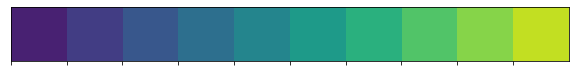

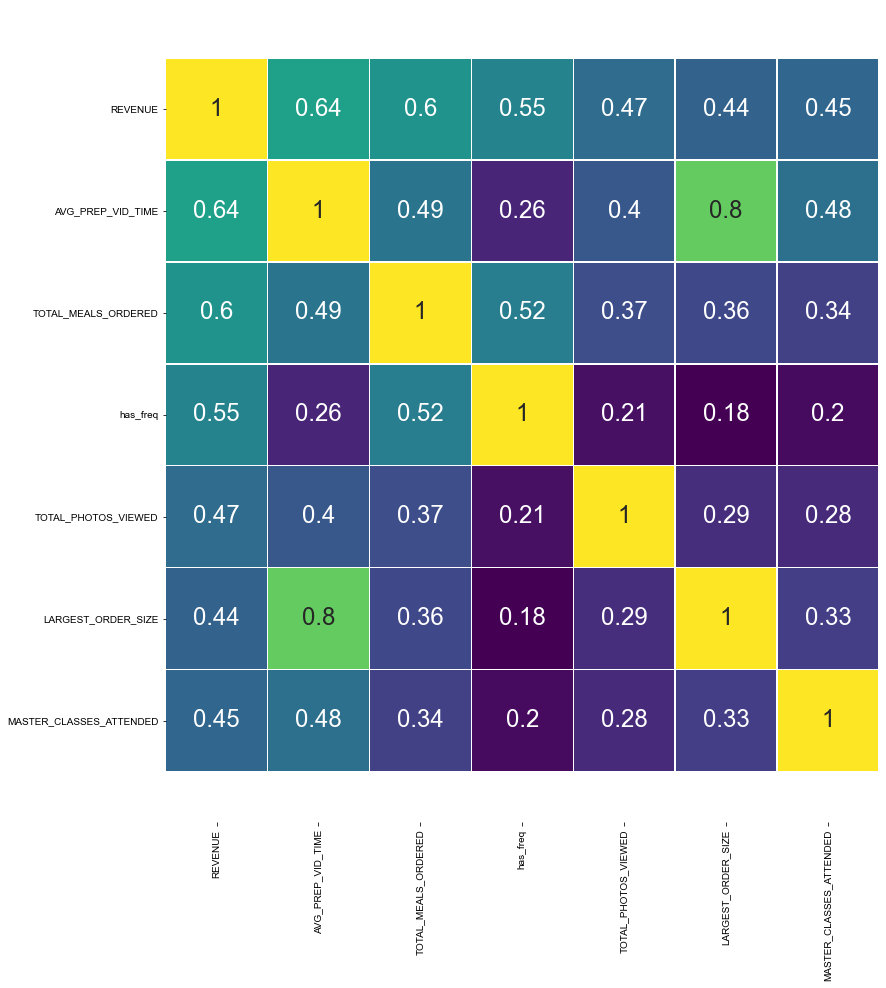

In [19]:
# developing a small correlation matrix for profesional emails
chef_select_corr = chef_select.corr(method = 'pearson')    

# filtering the results to only show correlations with Revenue
chef_select_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

# utilizing palplot to create a color map
sns.palplot(sns.color_palette('viridis', 10))

#plot size
fig, ax = plt.subplots(figsize=(15,15))
sns.set(font_scale =2)

#creating heat map
sns.heatmap(data = chef_select_corr,
            cmap = 'viridis',
            square = True,
            annot = True,
            linecolor = 'white',
            linewidths = 0.5,
            cbar = False)

#editing the map
bottom, top = plt.ylim()
bottom += 0.5            
top -= 0.5               
plt.ylim(bottom, top)

#saving the figure and displaying the plot
plt.savefig('Chef Correlation Heatmap Continous Variables.png')
plt.show()

In [ ]:
# preparing training and testing data sets for models

# droping variables that the model dont need
chef_data   = chef.drop(['NAME',
                         'EMAIL',
                         'FIRST_NAME',
                         'FAMILY_NAME',
                         'EMAIL_DOMAIN',
                         'email_domain_group'
                         ],
                         axis = 1)


# preparing response variables
chef_target = chef.loc[ : , 'REVENUE']
log_chef_target = chef.loc[ : , 'REVENUE']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")

In [ ]:

# looping to make x-variables suitable for statsmodels
for val in chef_data:
    print(f"'{val}',")

In [ ]:
#declaring set of x-variables
x_variables = [ 'CONTACTS_W_CUSTOMER_SERVICE',
                                            'AVG_PREP_VID_TIME',
                                            'LARGEST_ORDER_SIZE',
                                            'MASTER_CLASSES_ATTENDED',
                                            'MEDIAN_MEAL_RATING',
                                            'TOTAL_PHOTOS_VIEWED',
                                            'log_AVG_TIME_PER_SITE_VISIT',
                                            'log_TOTAL_MEALS_ORDERED',
                                            'has_UNIQUE_MEALS_PURCH',
                                            'has_freq',
                                            'has_contact']

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

In [ ]:
# ORDINARY LEAST SQUARES REGRESSION

# merging X_train and y_train so that they can be used in statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """REVENUE ~   
                                            CONTACTS_W_CUSTOMER_SERVICE +
                                            AVG_PREP_VID_TIME +
                                            LARGEST_ORDER_SIZE +
                                            MASTER_CLASSES_ATTENDED +
                                            MEDIAN_MEAL_RATING +
                                            TOTAL_PHOTOS_VIEWED +
                                            log_AVG_TIME_PER_SITE_VISIT +
                                            log_TOTAL_MEALS_ORDERED +
                                            has_UNIQUE_MEALS_PURCH +
                                            has_freq +
                                            has_contact
                                                """,
                                data = chef)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

In [ ]:
# OLS Model in SCIKIT-LEARN 

# preparing x-variables from the OLS model
chef_data = chef[x_variables]


# preparing response variable
chef_target = chef['REVENUE']


###############################################
## setting up more than one train-test split ##
###############################################

# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            chef_data,     # x-variables
            chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            chef_data,         # x-variables
            chef_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [ ]:
# INSTANTIATING a Linear Regression model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square

lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)

# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

In [ ]:
# zipping each feature name to its coefficient
lr_model_values = zip(chef[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

In [ ]:
# LASSO REGRESSION MODEL

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lasso_test_gap = abs(lr_train_score - lr_test_score).round(4)

In [ ]:

# zipping each feature name to its coefficient
lasso_model_values = zip(chef.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

In [ ]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

In [ ]:
# ARD MODEL

# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

In [ ]:
# zipping each feature name to its coefficient
ard_model_values = zip(chef.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

In [ ]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

In [ ]:
# preparing explanatory variable data
chef_ks_data = chef.drop(['REVENUE',
                              'NAME',
                              'EMAIL',
                              'FIRST_NAME',
                              'FAMILY_NAME',
                              'EMAIL_DOMAIN',
                              'email_domain_group'],
                         axis = 1)

# preparing the target variable
chef_ks_target = chef.loc[ :, 'REVENUE']

In [ ]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}            {lr_test_score}
Lasso      {lasso_train_score}            {lasso_test_score}
ARD        {ard_train_score}            {ard_test_score}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance_chef = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance_chef.to_excel('./model_results/linear_model_performance_chef.xlsx',
                           index = False)

In [ ]:
prediction_results = pd.DataFrame(data = {
    'Original Revenue'     : y_test_FULL,
    'LR Predictions'       : lr_pred.round(decimals = 2),
    'Lasso Predictions'    : lasso_pred.round(decimals = 2),
    'ARD Predictions'      : ard_pred.round(decimals = 2),
    'LR Deviation'         : lr_pred.round(decimals = 2) - y_test_FULL,
    'Lasso Deviation'      : lasso_pred.round(decimals = 2) - y_test_FULL,
    'ARD Deviation'        : ard_pred.round(decimals = 2) - y_test_FULL,
    })


prediction_results.to_excel(excel_writer = './model_results/linear_model_predictions_chef.xlsx',
                            index = False)

In [ ]:
# specifying file names

performance_file = './model_results/linear_model_performance_chef.xlsx'
prediction_file  = './model_results/linear_model_predictions_chef.xlsx'

# reading files into Python
performance = pd.read_excel(performance_file)
predictions = pd.read_excel(prediction_file)


performance.head(n=4)

In [ ]:
# preparing explanatory variable data
chef_ks_data = chef.drop(['REVENUE',
                              'NAME',
                              'EMAIL',
                              'FIRST_NAME',
                              'FAMILY_NAME',
                              'EMAIL_DOMAIN',
                              'email_domain_group'],
                         axis = 1)

# preparing the target variable
chef_ks_target = chef.loc[ :, 'REVENUE']

In [ ]:
# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            chef_ks_data,
            chef_ks_target,
            test_size = 0.25,
            random_state = 219)

In [ ]:
# INSTANTIATING a KNN model object
knn_reg = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = 1)


# FITTING to the training data
knn_fit = knn_reg.fit(X_train, y_train)


# PREDICTING on new data
knn_reg_pred = knn_fit.predict(X_test)


# SCORING the results
print('KNN Training Score:', knn_reg.score(X_train, y_train).round(4))
print('KNN Testing Score :',  knn_reg.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_reg_score_train = knn_reg.score(X_train, y_train).round(4)
knn_reg_score_test  = knn_reg.score(X_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_reg_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

In [ ]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 21)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [ ]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

In [ ]:
# INSTANTIATING a model with the optimal number of neighbors
knn_opt = KNeighborsRegressor(algorithm = 'auto',
                              n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_opt_fit = knn_opt.fit(X_train, y_train)



# PREDITCING on new data
knn_opt_pred = knn_opt_fit.predict(X_test)



# SCORING the results
print('KNN Training Score:', knn_opt.score(X_train, y_train).round(4))
print('KNN Testing Score :',  knn_opt.score(X_test, y_test).round(4))


# saving scoring data for future use
knn_opt_score_train = knn_opt.score(X_train, y_train).round(4)
knn_opt_score_test  = knn_opt.score(X_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_reg_score_train - knn_reg_score_test).round(4))
knn_opt_test_gap = abs(knn_reg_score_train - knn_reg_score_test).round(4)

In [ ]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with housing_data
scaler.fit(chef_ks_data)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(chef_ks_data)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)

In [ ]:
##############################################################################
# Unscaled Dataset
##############################################################################

# subsetting the original dataset
chef_subset = chef_ks_data.loc[ : , ['log_TOTAL_MEALS_ORDERED',
                                     'MEDIAN_MEAL_RATING',
                                     'AVG_PREP_VID_TIME',
                                     'MASTER_CLASSES_ATTENDED',
                                     'LARGEST_ORDER_SIZE',
                                     'has_UNIQUE_MEALS_PURCH',
                                     'has_AVG_CLICKS_PER_VISIT']]



# UNSCALED correlation matrix
df_corr = chef_subset.corr().round(2)




In [ ]:
# this is the exact code we were using before
X_train_STAND, X_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            X_scaled_df,
            chef_ks_target,
            test_size = 0.25,
            random_state = 219)

In [ ]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = 5)



# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_STAND, y_train_STAND)



# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(X_test_STAND)



# SCORING the results
print('KNN Training Score:', knn_stand.score(X_train_STAND, y_train_STAND).round(4))
print('KNN Testing Score :',  knn_stand.score(X_test_STAND, y_test_STAND).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train_STAND, y_train_STAND).round(4)
knn_stand_score_test  = knn_stand.score(X_test_STAND, y_test_STAND).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)

In [ ]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}            {lr_test_score}
Lasso      {lasso_train_score}            {lasso_test_score}
ARD        {ard_train_score}            {ard_test_score}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance_chef = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance_chef.to_excel('./model_results/linear_model_performance_chef.xlsx',
                           index = False)

In [ ]:
# comparing results

print(f"""
KNN Model             Neighbors     Train Score      Test Score
----------------      ---------     ----------       ----------
Non-Standardized      1              {knn_reg_score_train}              {knn_reg_score_test}
Non-Standardized      14             {knn_opt_score_train}           {knn_opt_score_test}
Standardized          19             {knn_stand_score_train}           {knn_stand_score_test}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['KNN_Not_Standardized', 'KNN_Not_Standardized_Opt', 'KNN_Standardized_Opt'],
           
    
    'Training' : [knn_reg_score_train,
                  knn_opt_score_train,
                  knn_stand_score_train],
           
    
    'Testing'  : [knn_reg_score_test,
                  knn_opt_score_test,
                  knn_stand_score_test],
                    
    
    'Train-Test Gap' : [knn_reg_test_gap,
                        knn_opt_test_gap,
                        knn_stand_test_gap],
    
    'Model Size' : ['NA', 'NA' , 'NA'],
    
    'Model'      : ["NA", "NA", "NA"]}


In [ ]:
# converting model_performance into a DataFrame
knn_predictions = pd.DataFrame({
    'KNN' : knn_stand_pred.round(decimals = 2),
    'KNN Deviations' : knn_stand_pred.round(decimals = 2) - predictions['Original Revenue']})


# concatenating with former performance DataFrame
all_predictions = pd.concat([predictions, knn_predictions],
                              axis = 1)


# sending model results to Excel
all_predictions.to_excel('./datasets/linear_model_performance_chef.xlsx',
                           index = False)


# checking the results
all_predictions.head(n = 5)

In [ ]:
# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# concatenating with former performance DataFrame
total_performance = pd.concat([performance, model_performance],
                              axis = 0)


total_performance.sort_values(by = 'Testing',
                              ascending = False)


# sending model results to Excel
total_performance.to_excel('linear_model_performance_chef.xlsx',
                           index = False)

# checking the results
total_performance

<h2> Cross Sell Success Models </h2>

In [ ]:
# correlation analysis variables v corss sell succes
df_corr = chef.corr(method = 'pearson')

df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False)

In [ ]:
# declaring explanatory variables
chef_data = chef.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
chef_target = chef.loc[ : , 'CROSS_SELL_SUCCESS']

In [ ]:
# train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = chef_target) # Target is stratify to balance proportions o 0 and 1 for Cross_Sell_SUCCESS


# merging training data for statsmodels
chef_train = pd.concat([X_train, y_train], axis = 1)

In [ ]:
# instantiating a logistic regression model object
logistic_all = smf.logit(formula = """CROSS_SELL_SUCCESS ~      REVENUE + 
 TOTAL_MEALS_ORDERED + 
 UNIQUE_MEALS_PURCH + 
 CONTACTS_W_CUSTOMER_SERVICE + 
 PRODUCT_CATEGORIES_VIEWED + 
 AVG_TIME_PER_SITE_VISIT + 
 MOBILE_NUMBER + 
 CANCELLATIONS_BEFORE_NOON + 
 CANCELLATIONS_AFTER_NOON + 
 TASTES_AND_PREFERENCES + 
 PC_LOGINS + 
 MOBILE_LOGINS + 
 WEEKLY_PLAN + 
 EARLY_DELIVERIES + 
 LATE_DELIVERIES + 
 PACKAGE_LOCKER + 
 REFRIGERATED_LOCKER + 
 AVG_PREP_VID_TIME + 
 LARGEST_ORDER_SIZE + 
 MASTER_CLASSES_ATTENDED + 
 MEDIAN_MEAL_RATING + 
 AVG_CLICKS_PER_VISIT + 
 TOTAL_PHOTOS_VIEWED + 
 has_freq + 
 has_contact + 
 has_revenue + 
 has_TOTAL_PHOTOS_VIEWED + 
 has_MASTER_CLASSES_ATTENDED + 
 has_EARLY_DELIVERIES + 
 has_WEEKLY_PLAN + 
 has_AVG_CLICKS_PER_VISIT + 
 has_professional + 
 has_personal + 
 has_PRODUCT_CATEGORIES_VIEWED + 
 has_MOBILE_LOGINS                                
                                                             """,                                                
                           data    = chef_train)

     
# fitting the model object
logis_all = logistic_all.fit()


# checking the results SUMMARY
logis_all.summary()


In [ ]:
# developing a model where all features are significn based on thier p-values

# instantiating a logistic regression model object
logit_ace = smf.logit(formula = """CROSS_SELL_SUCCESS ~  
                                                         has_revenue +
                                                         has_professional +
                                                         CANCELLATIONS_BEFORE_NOON  
                                                          """,
                          data = chef_train)


# fitting the model object
logit_ace = logit_ace.fit()


# checking the results SUMMARY
logit_ace.summary()

In [ ]:
# explanatory sets from last session

# creating a dictionary to store candidate models


 # full model
candidate_dict = {
    'logit_full'   : [    'REVENUE', 
 'TOTAL_MEALS_ORDERED', 
 'UNIQUE_MEALS_PURCH', 
 'CONTACTS_W_CUSTOMER_SERVICE', 
 'PRODUCT_CATEGORIES_VIEWED', 
 'AVG_TIME_PER_SITE_VISIT', 
 'MOBILE_NUMBER', 
 'CANCELLATIONS_BEFORE_NOON', 
 'CANCELLATIONS_AFTER_NOON', 
 'TASTES_AND_PREFERENCES', 
 'PC_LOGINS', 
 'MOBILE_LOGINS', 
 'WEEKLY_PLAN', 
 'EARLY_DELIVERIES', 
 'LATE_DELIVERIES', 
 'PACKAGE_LOCKER', 
 'REFRIGERATED_LOCKER', 
 'AVG_PREP_VID_TIME', 
 'LARGEST_ORDER_SIZE', 
 'MASTER_CLASSES_ATTENDED', 
 'MEDIAN_MEAL_RATING', 
 'AVG_CLICKS_PER_VISIT', 
 'TOTAL_PHOTOS_VIEWED', 
 'has_freq', 
 'has_contact', 
 'has_TOTAL_PHOTOS_VIEWED', 
 'has_MASTER_CLASSES_ATTENDED', 
 'has_EARLY_DELIVERIES', 
 'has_WEEKLY_PLAN', 
 'has_AVG_CLICKS_PER_VISIT', 
 'has_professional', 
 'has_personal', 
 'has_PRODUCT_CATEGORIES_VIEWED', 
 'has_MOBILE_LOGINS'  ],
 

 # significant variables only (set 1)
    'logit_sig'    : [   'MOBILE_NUMBER' ,  
                         'AVG_PREP_VID_TIME' ,  
                         'has_professional' ,
                         'has_freq' ,
                         'has_contact' ,
                         'EARLY_DELIVERIES' ,
                         'CANCELLATIONS_BEFORE_NOON' ,
                         'WEEKLY_PLAN' ,
                         'PC_LOGINS',
                         'has_revenue',
                         'has_personal'
                     ]}

In [ ]:
# train/test split with the full model
chef_data   =  chef.loc[ : , candidate_dict['logit_sig']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(X_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(X_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(X_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(X_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(X_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(X_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

In [ ]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

In [ ]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")

In [ ]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

In [ ]:
# Observing the models coefficients


# zipping each feature name to its coefficient
logreg_model_values = zip(chef[candidate_dict['logit_sig']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

In [ ]:
# user defined function to display_tree

def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img


# user defined function to plot_feature_importances

def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = X_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [ ]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
full_tree_fit = full_tree.fit(X_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(X_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(X_train,
                                                    y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(X_test,
                                                    y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(X_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(X_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

In [ ]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")

In [ ]:
# calling display_tree
display_tree(tree       = full_tree_fit,
             feature_df = X_train)

In [ ]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 2,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(chef_data, chef_target)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(X_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(X_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(X_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

In [ ]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")

In [ ]:
# calling display_tree
display_tree(tree       = pruned_tree_fit,
             feature_df = X_train)

In [ ]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train  = X_train,
                         export = False)

In [ ]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}         {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}         {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)

In [ ]:

# user defined function optimal_neighbors
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


# user defined function visual_cm
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [ ]:
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data        = chef_data,
                                  y_data        = chef_target,
                                  response_type = 'class')

In [ ]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(chef_data)


# TRANSFORMING the data
X_scaled     = scaler.transform(chef_data)


# converting to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            X_scaled_df,
            chef_target,
            random_state = 219,
            test_size = 0.25,
            stratify = chef_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(X_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(X_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(X_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(X_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

In [ ]:
# train/test split with the logit_sig variables
Chef_data   =  chef.loc[ : , candidate_dict['logit_sig']]
chef_target =  chef.loc[ : , 'CROSS_SELL_SUCCESS']


# train/test split
X_train, X_test, y_train, y_test = train_test_split(
            chef_data,
            chef_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = chef_target)

In [ ]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 4.0,
                                warm_start = False,
                                random_state = 219)

In [ ]:
# FITTING the training data
lr_default_fit = lr_default.fit(chef_data, chef_target)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(X_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(X_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(X_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

In [ ]:
# RandomizedSearchCV


# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 5.0, 0.1)
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 300)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 250,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

In [ ]:
# checking the best estimator for the model
lr_tuned_cv.best_estimator_

In [ ]:
## building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(X_test)


# print('LR Tuned Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('LR Tuned Testing  ACCURACY:', lr_tuned.score(X_test, y_test).round(4))
print('LR Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(X_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(X_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc




In [ ]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")

In [ ]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(X_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(X_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

In [ ]:
# Hypertuning on Classification Trees

# declaring a hyperparameter space
criterion_space = ['gini', 'entropy']
splitter_space  = ['best', 'random']
depth_space     = pd.np.arange(1, 25, 1)
leaf_space      = pd.np.arange(1, 100, 1)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 400,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

In [ ]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(X_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(X_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(X_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc




In [ ]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")

In [ ]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(X_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(X_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

In [ ]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = 4,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [ ]:
# FITTING the training data
rf_default_fit = rf_default.fit(chef_data, chef_target)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(X_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(X_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

In [ ]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")

In [ ]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(X_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(X_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance


In [ ]:
#tune the model's hyperparameters using RandomizedSearchCV.

# FITTING the training data
rf_default_fit = rf_default.fit(chef_data, chef_target)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(X_test)


# declaring a hyperparameter space
estimator_space  = pd.np.arange(100, 200, 25)
leaf_space       = pd.np.arange(1, 20, 5)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 300,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

In [ ]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

In [ ]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(chef_data,chef_target)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(X_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(X_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

In [ ]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")

In [ ]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(X_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(X_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

In [ ]:
# declaring a hyperparameter space
learn_space        = pd.np.arange(100, 500, 100)
estimator_space    = pd.np.arange(100, 200, 25)
depth_space        = pd.np.arange(10, 200, 20)
warm_start_space   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space,
              'warm_start'     : warm_start_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 320,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(chef_data, chef_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))